In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

### Segmentation

#### Original Image

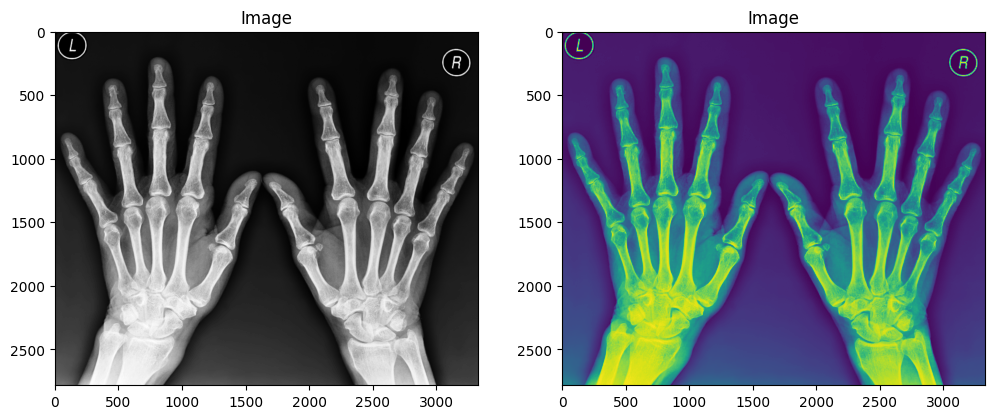

In [2]:
image = cv2.imread("Images/X-Raj.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Image")
plt.imshow(image, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Image")
plt.imshow(image)

plt.show()

#### Histogram

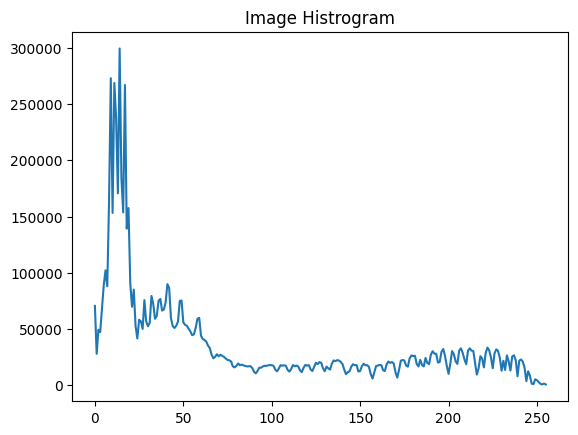

In [3]:
hist = cv2.calcHist([image], [0], None, [256], [0,256])

plt.title("Image Histrogram")
plt.plot(hist)
plt.show()

#### Thresholding

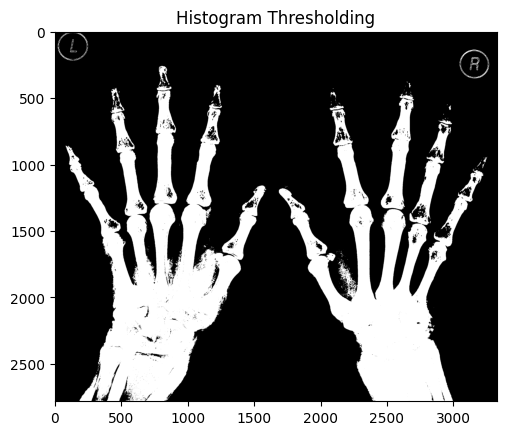

In [4]:
threshold_1 = 125
threshold_2 = 245

threshold_image = np.zeros(image.shape)
threshold_image[(threshold_1 <= image) * (image <= threshold_2)] = 255

plt.title("Histogram Thresholding")
plt.imshow(threshold_image, vmin=0, vmax=255, cmap="gray")
plt.show()

#### Adaptive Thresholding

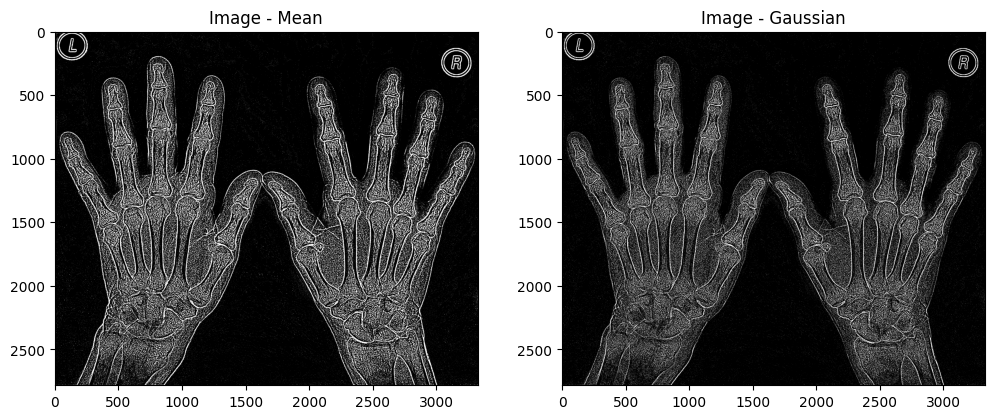

In [5]:
adaptive_thresholding_mean = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
adaptive_thresholding_gaussian = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Image - Mean")
plt.imshow(adaptive_thresholding_mean, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Image - Gaussian")
plt.imshow(adaptive_thresholding_gaussian, cmap="gray")

plt.show()

### Watershed Algorithm

#### Threshold using OTSU & Noise Removal

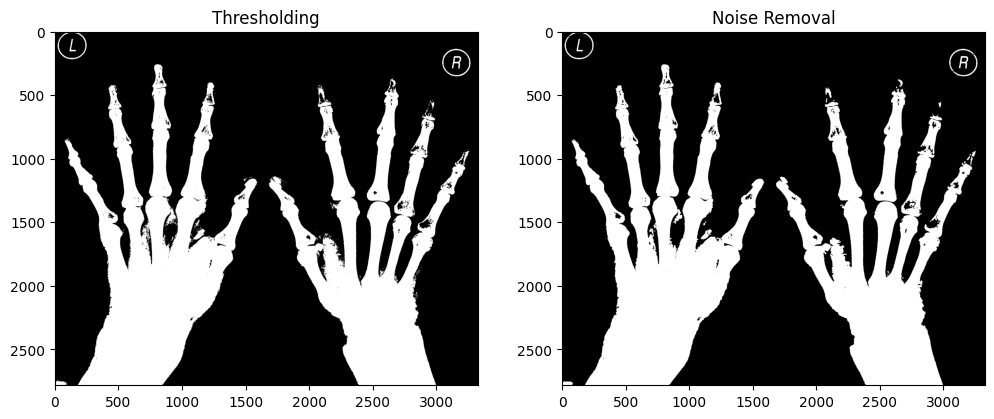

In [6]:
# Thresholding
ret, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Noise Removal
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel, iterations = 3)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Thresholding")
plt.imshow(thresh, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Noise Removal")
plt.imshow(opening, cmap="gray")

plt.show()

#### Foreground, Background, Unknown

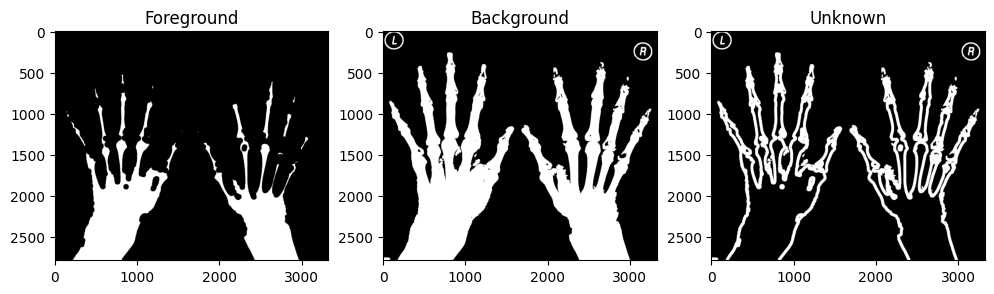

In [7]:
# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.1*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.title("Foreground")
plt.imshow(sure_fg, cmap="gray")

plt.subplot(1, 3, 2)
plt.title("Background")
plt.imshow(sure_bg, cmap="gray")

plt.subplot(1, 3, 3)
plt.title("Unknown")
plt.imshow(unknown, cmap="gray")

plt.show()

#### Watershed Algorithm

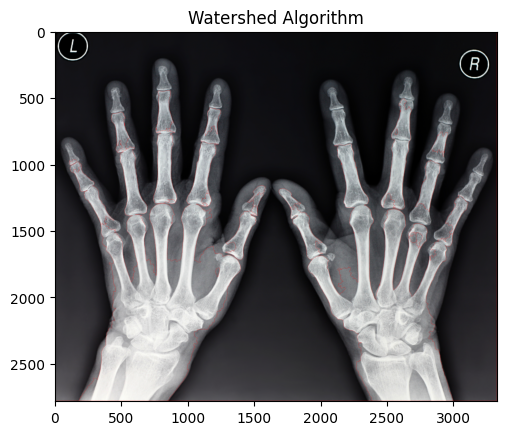

In [8]:
# Connected Components determines the connectivity of blob-like regions in a binary image.
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

img = cv2.imread("Images/X-Raj.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

markers = cv2.watershed(img, markers)
img[markers == -1] = [255,0,0]

plt.title("Watershed Algorithm")
plt.imshow(img)
plt.show()

### Morphological Transform

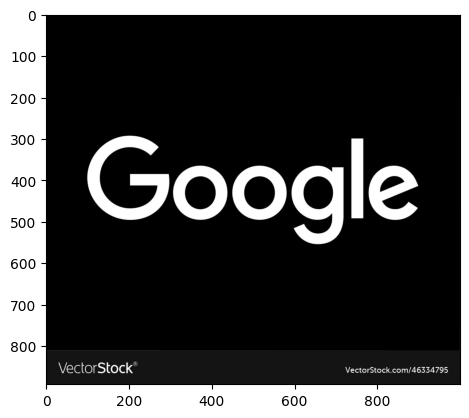

In [9]:
image = cv2.imread("Images/Google.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image, cmap="gray")
plt.show()

#### Erosion and Dilation with a Circular Structuring Element

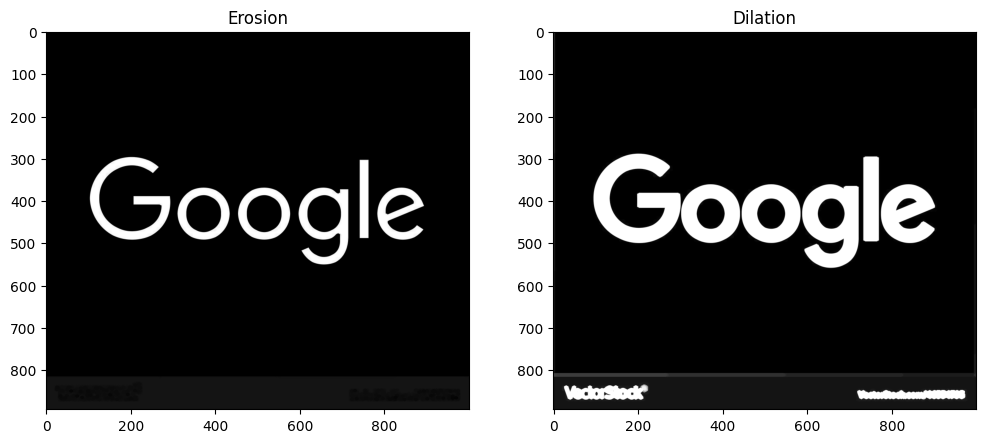

In [10]:
circle = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

erosion = cv2.erode(image, circle, iterations=2)
dilation = cv2.dilate(image, circle, iterations=2)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Erosion")
plt.imshow(erosion, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Dilation")
plt.imshow(dilation, cmap="gray")

plt.show()

#### Erosion and Dilation with a Square Structuring Element

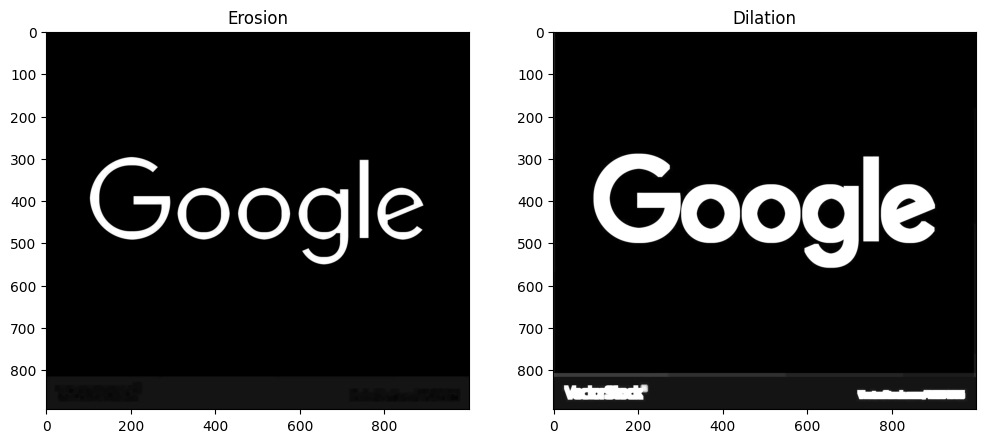

In [11]:
square = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

erosion = cv2.erode(image, square, iterations=2)
dilation = cv2.dilate(image, square, iterations=2)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Erosion")
plt.imshow(erosion, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Dilation")
plt.imshow(dilation, cmap="gray")

plt.show()

#### Closing and Opening with a Cross Shaped Structuring Element

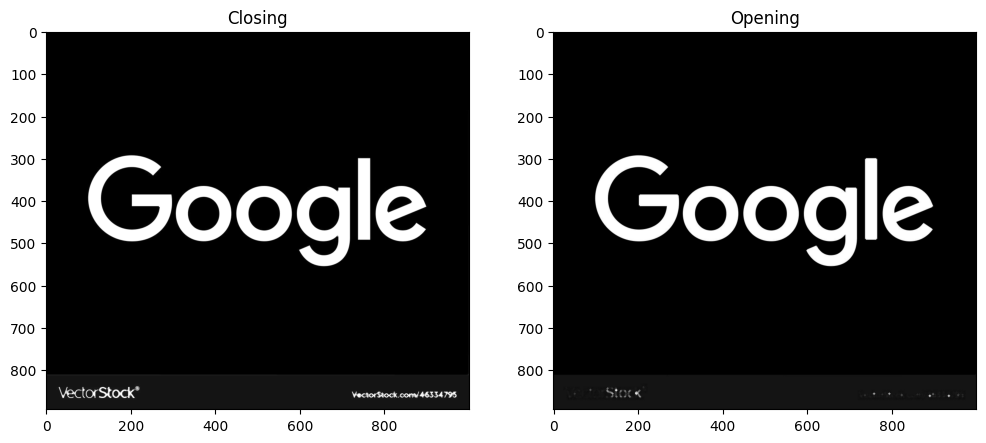

In [12]:
cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, cross)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, cross)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Closing")
plt.imshow(closing, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Opening")
plt.imshow(opening, cmap="gray")

plt.show()

### Mask - Tamil Image

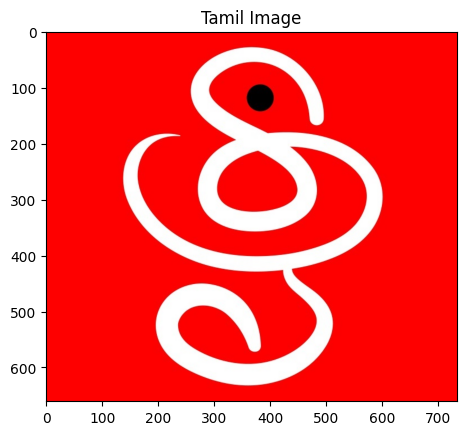

In [13]:
image = cv2.imread("Images/Tamil.jpg")
clr_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.title("Tamil Image")
plt.imshow(clr_image)
plt.show()

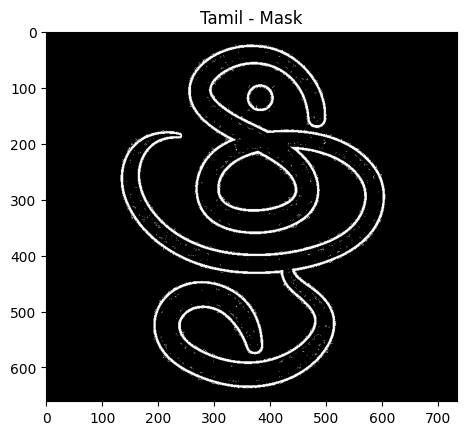

In [14]:
mask = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

plt.title("Tamil - Mask")
plt.imshow(mask, cmap="gray")
plt.show()